# Check Augmentation Results

In [1]:
import os

os.chdir("../..")

In [2]:
!pwd

/Users/wiktorlazarski/Desktop/my_project/head-segmentation


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms

plt.rcParams["figure.figsize"] = (12, 10)
plt.rcParams["image.cmap"] = "gray"

import head_segmentation.image_processing as ip
from scripts.training import augmentations as aug
from scripts.training import data_loading as dl

%load_ext autoreload
%autoreload 2

In [4]:
def draw_sample(index):
    fig, axis = plt.subplots(5, 2, figsize=(10, 20))

    for i in range(5):
        img, segmap = dataset[index]

        if img.shape[0] == 3:
            img = img.permute(1, 2, 0)
            
        axis[i, 0].imshow(img)
        axis[i, 1].imshow(segmap)

In [5]:
DATASET_PATH = os.path.join(os.getcwd(), "data", "dataset", "train")

aug_pipeline = aug.AugmentationPipeline(all_augmentations=False, content_augmentation_keys=["hflip"])
#preprocess_pipeline = ip.create_preprocessing_pipeline((512, 512))
aug_pipeline = aug.AugmentationPipeline()

dataset = dl.CelebAHeadSegmentationDataset(
    dataset_path=DATASET_PATH, 
    augmentation_pipeline=aug_pipeline,
 #   preprocess_pipeline=preprocess_pipeline
)

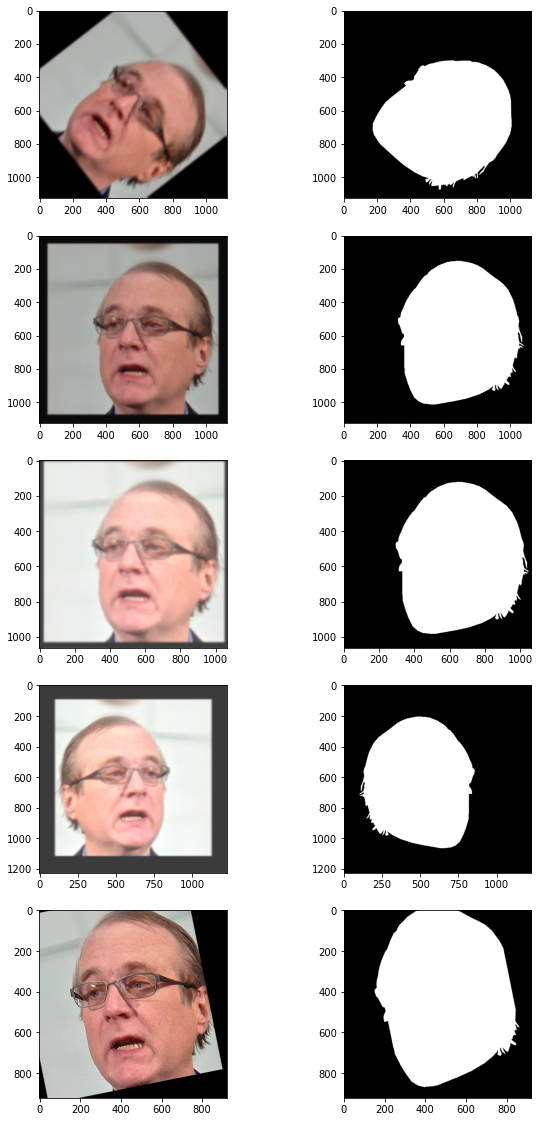

In [6]:
draw_sample(2320)